In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Update this path based on your extracted file location
file_path = "/content/drive/MyDrive/CIC-IDS2017/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv"

# Load dataset
df = pd.read_csv(file_path)

# Display first few rows
print(df.head())

# Check dataset info
print(df.info())

# Check for missing values
print(df.isnull().sum())


    Destination Port   Flow Duration   Total Fwd Packets  \
0                 80           38308                   1   
1                389             479                  11   
2                 88            1095                  10   
3                389           15206                  17   
4                 88            1092                   9   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        1                            6   
1                        5                          172   
2                        6                         3150   
3                       12                         3452   
4                        6                         3150   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                             6                       6   
1                           326                      79   
2                          3150                    1575   
3                          6660                 

In [ ]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")


Number of duplicate rows: 81909


In [ ]:
# Remove duplicate rows
df = df.drop_duplicates()
print(f"Shape after removing duplicates: {df.shape}")


Shape after removing duplicates: (610794, 79)


In [ ]:
# Check for missing values
missing_values = df.isnull().sum().sum()
print(f"Total missing values: {missing_values}")


Total missing values: 61


In [ ]:
# Drop rows with missing values
df.dropna(inplace=True)

# Confirm missing values are removed
missing_values_after = df.isnull().sum().sum()
print(f"Total missing values after removal: {missing_values_after}")


Total missing values after removal: 0


Highly correlated feature pairs (>|0.9| correlation):
(' Flow Duration', 'Fwd IAT Total')
(' Total Fwd Packets', ' Total Backward Packets')
(' Total Fwd Packets', ' Total Length of Bwd Packets')
(' Total Fwd Packets', ' Fwd Header Length')
(' Total Fwd Packets', ' Bwd Header Length')
(' Total Fwd Packets', ' Fwd Header Length.1')
(' Total Fwd Packets', 'Subflow Fwd Packets')
(' Total Fwd Packets', ' Subflow Bwd Packets')
(' Total Fwd Packets', ' Subflow Bwd Bytes')
(' Total Fwd Packets', ' act_data_pkt_fwd')
(' Total Backward Packets', ' Total Length of Bwd Packets')
(' Total Backward Packets', ' Fwd Header Length')
(' Total Backward Packets', ' Bwd Header Length')
(' Total Backward Packets', ' Fwd Header Length.1')
(' Total Backward Packets', 'Subflow Fwd Packets')
(' Total Backward Packets', ' Subflow Bwd Packets')
(' Total Backward Packets', ' Subflow Bwd Bytes')
(' Total Backward Packets', ' act_data_pkt_fwd')
('Total Length of Fwd Packets', ' Subflow Fwd Bytes')
(' Total Length of

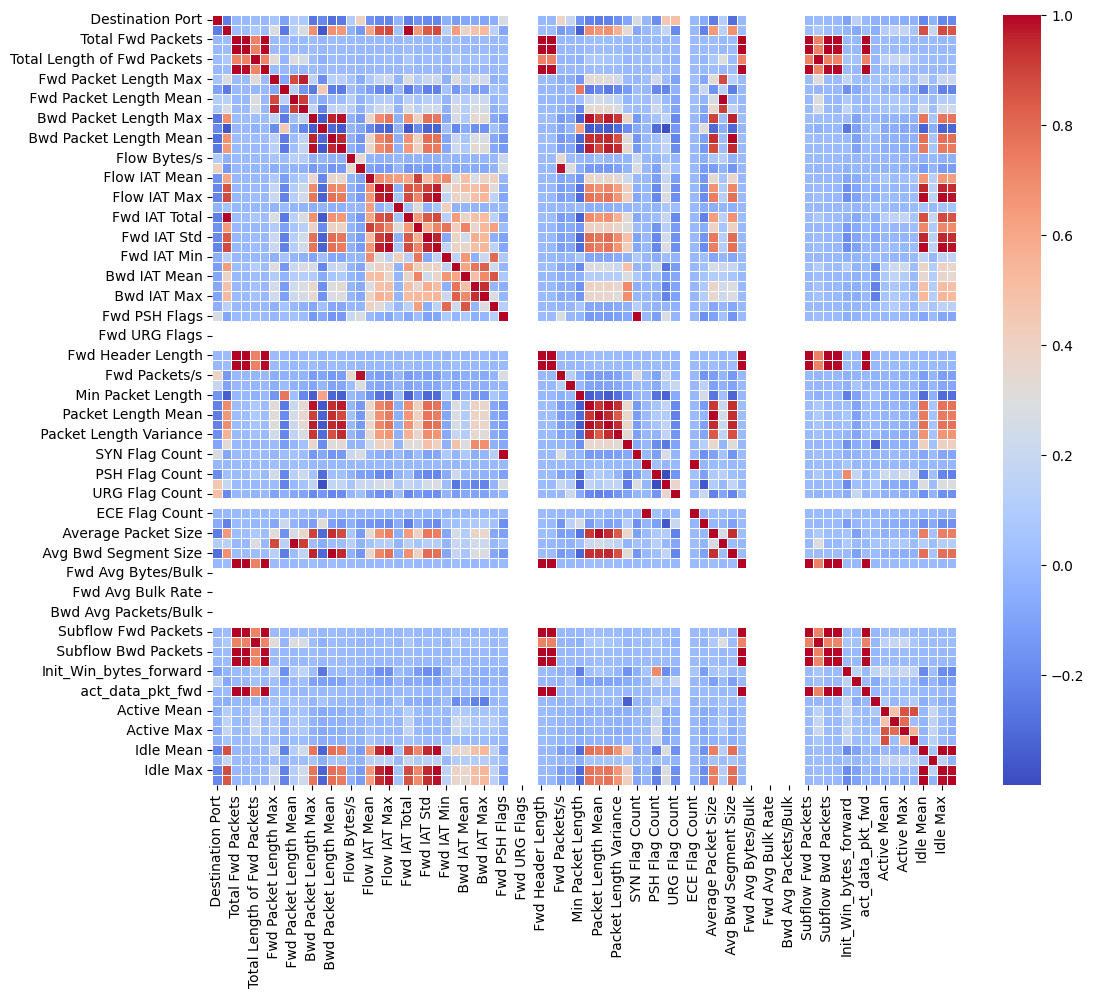

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select only numerical columns
df_numeric = df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Set a threshold (e.g., 0.9)
threshold = 0.9

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)

# Identify highly correlated features
high_corr_pairs = np.where(np.abs(corr_matrix) > threshold)
high_corr_pairs = [(corr_matrix.index[i], corr_matrix.columns[j])
                   for i, j in zip(*high_corr_pairs) if i != j and i < j]

print("Highly correlated feature pairs (>|0.9| correlation):")
for pair in high_corr_pairs:
    print(pair)

plt.show()


Dropping 32 highly correlated features:
{' Max Packet Length', ' Packet Length Std', ' Bwd IAT Max', ' Fwd Packet Length Std', ' Fwd IAT Std', ' Avg Bwd Segment Size', ' Bwd Packet Length Std', ' Fwd Header Length', 'Idle Mean', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Max', ' Idle Max', ' Avg Fwd Segment Size', ' Bwd Packet Length Mean', ' Average Packet Size', ' SYN Flag Count', 'Subflow Fwd Packets', ' Total Length of Bwd Packets', 'Fwd Packets/s', ' ECE Flag Count', ' Fwd Header Length.1', ' Subflow Fwd Bytes', ' Total Backward Packets', ' Subflow Bwd Bytes', ' act_data_pkt_fwd', ' Packet Length Mean', ' Flow IAT Max', ' Idle Min', ' Subflow Bwd Packets', ' Bwd Header Length', ' Packet Length Variance'}


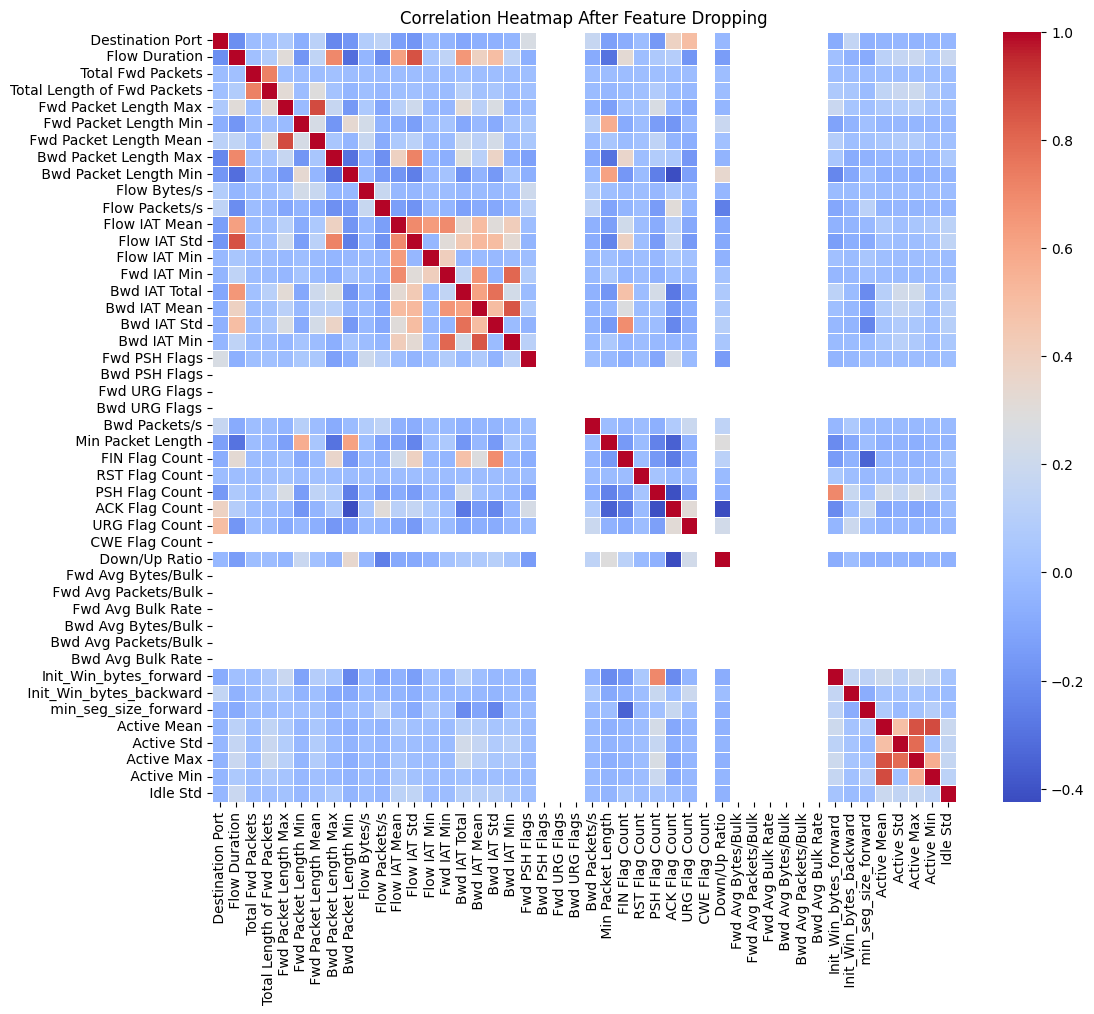

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset (ensure you use the cleaned dataset)
df = pd.read_csv("/content/drive/MyDrive/CIC-IDS2017/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv")  # Change to your actual dataset

# Select numerical columns only
df_numeric = df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = df_numeric.corr().abs()

# Set a correlation threshold
threshold = 0.9

# Find highly correlated feature pairs
high_corr_pairs = np.where(corr_matrix > threshold)
high_corr_pairs = [(corr_matrix.index[i], corr_matrix.columns[j]) for i, j in zip(*high_corr_pairs) if i != j and i < j]

# Automatically select features to drop
features_to_drop = set()
for feature1, feature2 in high_corr_pairs:
    if feature1 not in features_to_drop and feature2 not in features_to_drop:
        features_to_drop.add(feature2)  # Drop one of the correlated features

print(f"Dropping {len(features_to_drop)} highly correlated features:")
print(features_to_drop)

# Drop the selected features
df_cleaned = df.drop(columns=features_to_drop, errors='ignore')

# Save the cleaned dataset
df_cleaned.to_csv("cleaned_dataset.csv", index=False)

# Verify with a new correlation heatmap
# Compute correlation matrix using only numeric columns
df_numeric_cleaned = df_cleaned.select_dtypes(include=[np.number])

# Verify with a new correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_numeric_cleaned.corr(), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap After Feature Dropping")
plt.show()



In [ ]:
# Check for missing values
missing_values = df_cleaned.isnull().sum()
print(missing_values[missing_values > 0])


Flow Bytes/s    1008
dtype: int64


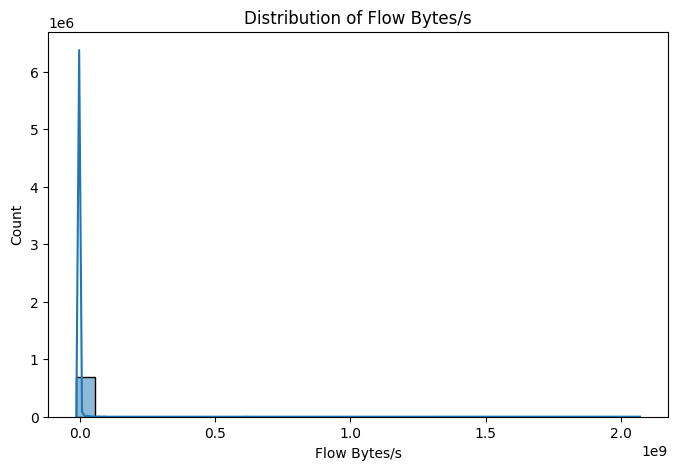

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned['Flow Bytes/s'], kde=True, bins=30)
plt.title('Distribution of Flow Bytes/s')
plt.show()


In [ ]:
df_cleaned = df_cleaned.copy()  # Ensures we modify the actual DataFrame

# Replace inf values with NaN first
df_cleaned['Flow Bytes/s'] = df_cleaned['Flow Bytes/s'].replace([np.inf, -np.inf], np.nan)

# Replace NaN with the 99th percentile of valid values
finite_max = df_cleaned['Flow Bytes/s'].quantile(0.99)
df_cleaned['Flow Bytes/s'] = df_cleaned['Flow Bytes/s'].fillna(finite_max)


In [ ]:
df_cleaned['Flow Bytes/s'] = df_cleaned['Flow Bytes/s'].fillna(df_cleaned['Flow Bytes/s'].median())



In [ ]:
df_cleaned['Flow Bytes/s'] = np.log1p(df_cleaned['Flow Bytes/s'])


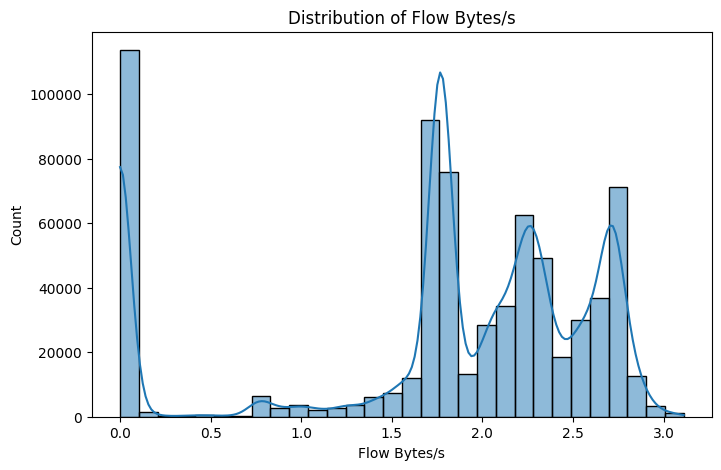

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned['Flow Bytes/s'], kde=True, bins=30)
plt.title('Distribution of Flow Bytes/s')
plt.show()

In [ ]:
# Check for missing values
missing_values = df_cleaned.isnull().sum()
print(missing_values[missing_values > 0])


Series([], dtype: int64)


In [ ]:


# Now check unique labels
print(df[' Label'].unique())

['BENIGN' 'DoS slowloris' 'DoS Slowhttptest' 'DoS Hulk' 'DoS GoldenEye'
 'Heartbleed']


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Define labels
labels = ['BENIGN', 'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye', 'Heartbleed']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform labels
df_cleaned[' Label'] = label_encoder.fit_transform(df_cleaned[' Label'])

# Mapping of labels
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


{'BENIGN': np.int64(0), 'DoS GoldenEye': np.int64(1), 'DoS Hulk': np.int64(2), 'DoS Slowhttptest': np.int64(3), 'DoS slowloris': np.int64(4), 'Heartbleed': np.int64(5)}


In [ ]:
print(df_cleaned[' Label'].unique())

[0 4 3 2 1 5]


In [ ]:
import numpy as np

# Check for infinite values
print(np.isinf(df_cleaned).sum())



 Destination Port                 0
 Flow Duration                    0
 Total Fwd Packets                0
Total Length of Fwd Packets       0
 Fwd Packet Length Max            0
 Fwd Packet Length Min            0
 Fwd Packet Length Mean           0
Bwd Packet Length Max             0
 Bwd Packet Length Min            0
Flow Bytes/s                      0
 Flow Packets/s                1297
 Flow IAT Mean                    0
 Flow IAT Std                     0
 Flow IAT Min                     0
 Fwd IAT Min                      0
Bwd IAT Total                     0
 Bwd IAT Mean                     0
 Bwd IAT Std                      0
 Bwd IAT Min                      0
Fwd PSH Flags                     0
 Bwd PSH Flags                    0
 Fwd URG Flags                    0
 Bwd URG Flags                    0
 Bwd Packets/s                    0
 Min Packet Length                0
FIN Flag Count                    0
 RST Flag Count                   0
 PSH Flag Count             

In [ ]:
df_cleaned[' Flow Packets/s'].replace(np.inf, df_cleaned[' Flow Packets/s'][df_cleaned[' Flow Packets/s'] != np.inf].mean(), inplace=True)


<ipython-input-43-98b65e27ec3e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[' Flow Packets/s'].replace(np.inf, df_cleaned[' Flow Packets/s'][df_cleaned[' Flow Packets/s'] != np.inf].mean(), inplace=True)


In [ ]:
print(np.isinf(df_cleaned).sum())  # Should now be 0 for all columns


 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
Total Length of Fwd Packets    0
 Fwd Packet Length Max         0
 Fwd Packet Length Min         0
 Fwd Packet Length Mean        0
Bwd Packet Length Max          0
 Bwd Packet Length Min         0
Flow Bytes/s                   0
 Flow Packets/s                0
 Flow IAT Mean                 0
 Flow IAT Std                  0
 Flow IAT Min                  0
 Fwd IAT Min                   0
Bwd IAT Total                  0
 Bwd IAT Mean                  0
 Bwd IAT Std                   0
 Bwd IAT Min                   0
Fwd PSH Flags                  0
 Bwd PSH Flags                 0
 Fwd URG Flags                 0
 Bwd URG Flags                 0
 Bwd Packets/s                 0
 Min Packet Length             0
FIN Flag Count                 0
 RST Flag Count                0
 PSH Flag Count                0
 ACK Flag Count                0
 URG Flag Count                0
 CWE Flag 

In [ ]:
print(df_cleaned.isna().sum())


 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
Total Length of Fwd Packets    0
 Fwd Packet Length Max         0
 Fwd Packet Length Min         0
 Fwd Packet Length Mean        0
Bwd Packet Length Max          0
 Bwd Packet Length Min         0
Flow Bytes/s                   0
 Flow Packets/s                0
 Flow IAT Mean                 0
 Flow IAT Std                  0
 Flow IAT Min                  0
 Fwd IAT Min                   0
Bwd IAT Total                  0
 Bwd IAT Mean                  0
 Bwd IAT Std                   0
 Bwd IAT Min                   0
Fwd PSH Flags                  0
 Bwd PSH Flags                 0
 Fwd URG Flags                 0
 Bwd URG Flags                 0
 Bwd Packets/s                 0
 Min Packet Length             0
FIN Flag Count                 0
 RST Flag Count                0
 PSH Flag Count                0
 ACK Flag Count                0
 URG Flag Count                0
 CWE Flag 

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned.drop(columns=[' Label']))  # Exclude target column


In [ ]:
from sklearn.model_selection import train_test_split

X = df_scaled  # Features (scaled)
y = df_cleaned[' Label']  # Target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


MLP (Multilayer Perceptron) Model

In [ ]:
import tensorflow as tf
import time
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report



# Define the MLP model
mlp_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  # Dropout to prevent overfitting
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(len(set(y_train)), activation='softmax')  # Output layer (adjust for binary/multi-class)
])

# Compile the model
mlp_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Start training time
start_time = time.time()

# Train the model
history = mlp_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# End training time
training_time = time.time() - start_time

# Predict on the test set
y_pred = np.argmax(mlp_model.predict(X_test), axis=1)

# Calculate Precision, Recall, F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("\nModel Performance on Test Set:")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1-Score: {f1:.6f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
17318/17318 ━━━━━━━━━━━━━━━━━━━━ 60s 3ms/step - accuracy: 0.9716 - loss: 0.0955 - val_accuracy: 0.9899 - val_loss: 0.0278
Epoch 2/20
17318/17318 ━━━━━━━━━━━━━━━━━━━━ 81s 3ms/step - accuracy: 0.9886 - loss: 0.0348 - val_accuracy: 0.9905 - val_loss: 0.0262
Epoch 3/20
17318/17318 ━━━━━━━━━━━━━━━━━━━━ 78s 3ms/step - accuracy: 0.9896 - loss: 0.0328 - val_accuracy: 0.9905 - val_loss: 0.0263
Epoch 4/20
17318/17318 ━━━━━━━━━━━━━━━━━━━━ 85s 3ms/step - accuracy: 0.9901 - loss: 0.0293 - val_accuracy: 0.9914 - val_loss: 0.0241
Epoch 5/20
17318/17318 ━━━━━━━━━━━━━━━━━━━━ 54s 3ms/step - accuracy: 0.9903 - loss: 0.0292 - val_accuracy: 0.9913 - val_loss: 0.0246
Epoch 6/20
17318/17318 ━━━━━━━━━━━━━━━━━━━━ 85s 3ms/step - accuracy: 0.9906 - loss: 0.0285 - val_accuracy: 0.9913 - val_loss: 0.0256
Epoch 7/20
17318/17318 ━━━━━━━━━━━━━━━━━━━━ 58s 3ms/step - accuracy: 0.9906 - loss: 0.0305 - val_accuracy: 0.9915 - val_loss: 0.0241
Epoch 8/20
17318/17318 ━━━━━━━━━━━━━━━━━━━━ 61s 4ms/step - accuracy: 

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on test set
y_pred = mlp_model.predict(X_test)
y_pred = y_pred.argmax(axis=1)  # Convert probabilities to class labels

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.6f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


4330/4330 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
Test Accuracy: 0.992861
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     88170
           1       0.98      0.99      0.99      2017
           2       0.98      1.00      0.99     46147
           3       0.97      0.99      0.98      1090
           4       0.99      0.98      0.99      1114
           5       1.00      1.00      1.00         3

    accuracy                           0.99    138541
   macro avg       0.99      0.99      0.99    138541
weighted avg       0.99      0.99      0.99    138541



1D CNN

In [ ]:
import tensorflow as tf
import time
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Reshape input for Conv1D (CNN requires a 3D input)
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the 1D CNN model
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(set(y_train)), activation='softmax')  # Output layer
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Start training time
start_time = time.time()

# Train the model
history_cnn = cnn_model.fit(X_train_cnn, y_train, epochs=20, batch_size=32, validation_data=(X_test_cnn, y_test))

# End training time
training_time = time.time() - start_time

# Predict on the test set
y_pred = np.argmax(cnn_model.predict(X_test_cnn), axis=1)

# Calculate Precision, Recall, F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("\nModel Performance on Test Set:")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1-Score: {f1:.6f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
17318/17318 ━━━━━━━━━━━━━━━━━━━━ 198s 11ms/step - accuracy: 0.9764 - loss: 0.0756 - val_accuracy: 0.9901 - val_loss: 0.0273
Epoch 2/20
17318/17318 ━━━━━━━━━━━━━━━━━━━━ 174s 10ms/step - accuracy: 0.9903 - loss: 0.0283 - val_accuracy: 0.9919 - val_loss: 0.0233
Epoch 3/20
17318/17318 ━━━━━━━━━━━━━━━━━━━━ 208s 10ms/step - accuracy: 0.9918 - loss: 0.0245 - val_accuracy: 0.9928 - val_loss: 0.0194
Epoch 4/20
17318/17318 ━━━━━━━━━━━━━━━━━━━━ 175s 10ms/step - accuracy: 0.9923 - loss: 0.0228 - val_accuracy: 0.9925 - val_loss: 0.0211
Epoch 5/20
17318/17318 ━━━━━━━━━━━━━━━━━━━━ 227s 12ms/step - accuracy: 0.9931 - loss: 0.0210 - val_accuracy: 0.9931 - val_loss: 0.0206
Epoch 6/20
17318/17318 ━━━━━━━━━━━━━━━━━━━━ 181s 10ms/step - accuracy: 0.9948 - loss: 0.0179 - val_accuracy: 0.9947 - val_loss: 0.0165
Epoch 7/20
17318/17318 ━━━━━━━━━━━━━━━━━━━━ 197s 10ms/step - accuracy: 0.9957 - loss: 0.0158 - val_accuracy: 0.9965 - val_loss: 0.0145
Epoch 8/20
17318/17318 ━━━━━━━━━━━━━━━━━━━━ 204s 10ms/s

In [ ]:
# Predict on test set
y_pred_cnn = cnn_model.predict(X_test_cnn)
y_pred_cnn = y_pred_cnn.argmax(axis=1)  # Convert probabilities to class labels

# Accuracy
accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
print(f"Test Accuracy: {accuracy_cnn:.6f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_cnn))


4330/4330 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step
Test Accuracy: 0.996925
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     88170
           1       0.99      0.99      0.99      2017
           2       0.99      1.00      1.00     46147
           3       0.98      0.99      0.98      1090
           4       0.99      0.99      0.99      1114
           5       1.00      1.00      1.00         3

    accuracy                           1.00    138541
   macro avg       0.99      0.99      0.99    138541
weighted avg       1.00      1.00      1.00    138541



LSTM

In [ ]:
import tensorflow as tf
import time
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Reshape input for LSTM (LSTM requires 3D input)
X_train_lstm = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_lstm = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define the LSTM model
lstm_model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(1, X_train.shape[1])),
    LSTM(64),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(set(y_train)), activation='softmax')  # Output layer
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Start training time
start_time = time.time()

# Train the model
history_lstm = lstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_data=(X_test_lstm, y_test))

# End training time
training_time = time.time() - start_time

# Predict on the test set
y_pred = np.argmax(lstm_model.predict(X_test_lstm), axis=1)

# Calculate Precision, Recall, F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("\nModel Performance on Test Set:")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1-Score: {f1:.6f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
17318/17318 ━━━━━━━━━━━━━━━━━━━━ 146s 8ms/step - accuracy: 0.9790 - loss: 0.0815 - val_accuracy: 0.9906 - val_loss: 0.0275
Epoch 2/20
17318/17318 ━━━━━━━━━━━━━━━━━━━━ 133s 8ms/step - accuracy: 0.9904 - loss: 0.0274 - val_accuracy: 0.9907 - val_loss: 0.0251
Epoch 3/20
17318/17318 ━━━━━━━━━━━━━━━━━━━━ 137s 7ms/step - accuracy: 0.9914 - loss: 0.0243 - val_accuracy: 0.9912 - val_loss: 0.0249
Epoch 4/20
17318/17318 ━━━━━━━━━━━━━━━━━━━━ 130s 7ms/step - accuracy: 0.9917 - loss: 0.0232 - val_accuracy: 0.9920 - val_loss: 0.0218
Epoch 5/20
17318/17318 ━━━━━━━━━━━━━━━━━━━━ 152s 8ms/step - accuracy: 0.9926 - loss: 0.0209 - val_accuracy: 0.9958 - val_loss: 0.0181
Epoch 6/20
17318/17318 ━━━━━━━━━━━━━━━━━━━━ 140s 8ms/step - accuracy: 0.9931 - loss: 0.0196 - val_accuracy: 0.9961 - val_loss: 0.0144
Epoch 7/20
17318/17318 ━━━━━━━━━━━━━━━━━━━━ 144s 8ms/step - accuracy: 0.9936 - loss: 0.0191 - val_accuracy: 0.9921 - val_loss: 0.0212
Epoch 8/20
17318/17318 ━━━━━━━━━━━━━━━━━━━━ 144s 8ms/step - ac

In [ ]:
# Predict on test set
y_pred_lstm = lstm_model.predict(X_test_lstm)
y_pred_lstm = y_pred_lstm.argmax(axis=1)  # Convert probabilities to class labels

# Accuracy
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
print(f"Test Accuracy: {accuracy_lstm:.6f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_lstm))


4330/4330 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step
Test Accuracy: 0.996665
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     88170
           1       0.99      0.98      0.99      2017
           2       0.99      1.00      1.00     46147
           3       0.98      0.99      0.98      1090
           4       0.99      0.99      0.99      1114
           5       1.00      1.00      1.00         3

    accuracy                           1.00    138541
   macro avg       0.99      0.99      0.99    138541
weighted avg       1.00      1.00      1.00    138541



CNN+LSTM

In [ ]:
import tensorflow as tf
import time
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Reshape input for CNN+LSTM (CNN needs 3D input)
X_train_cnn_lstm = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn_lstm = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the CNN+LSTM model
cnn_lstm_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(set(y_train)), activation='softmax')  # Output layer
])

# Compile the model
cnn_lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Start training time
start_time = time.time()

# Train the model
history_cnn_lstm = cnn_lstm_model.fit(X_train_cnn_lstm, y_train, epochs=20, batch_size=32, validation_data=(X_test_cnn_lstm, y_test))

# End training time
training_time = time.time() - start_time

# Predict on the test set
y_pred = np.argmax(cnn_lstm_model.predict(X_test_cnn_lstm), axis=1)

# Calculate Precision, Recall, F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("\nModel Performance on Test Set:")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1-Score: {f1:.6f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
17318/17318 ━━━━━━━━━━━━━━━━━━━━ 416s 24ms/step - accuracy: 0.9446 - loss: 0.1491 - val_accuracy: 0.9902 - val_loss: 0.0267
Epoch 2/20
17318/17318 ━━━━━━━━━━━━━━━━━━━━ 426s 23ms/step - accuracy: 0.9907 - loss: 0.0276 - val_accuracy: 0.9921 - val_loss: 0.0217
Epoch 3/20
17318/17318 ━━━━━━━━━━━━━━━━━━━━ 455s 24ms/step - accuracy: 0.9918 - loss: 0.0241 - val_accuracy: 0.9917 - val_loss: 0.0241
Epoch 4/20
17318/17318 ━━━━━━━━━━━━━━━━━━━━ 437s 23ms/step - accuracy: 0.9923 - loss: 0.0224 - val_accuracy: 0.9923 - val_loss: 0.0216
Epoch 5/20
17318/17318 ━━━━━━━━━━━━━━━━━━━━ 441s 23ms/step - accuracy: 0.9924 - loss: 0.0222 - val_accuracy: 0.9924 - val_loss: 0.0212
Epoch 6/20
17318/17318 ━━━━━━━━━━━━━━━━━━━━ 447s 23ms/step - accuracy: 0.9928 - loss: 0.0212 - val_accuracy: 0.9938 - val_loss: 0.0186
Epoch 7/20
17318/17318 ━━━━━━━━━━━━━━━━━━━━ 428s 23ms/step - accuracy: 0.9927 - loss: 0.0214 - val_accuracy: 0.9929 - val_loss: 0.0198
Epoch 8/20
17318/17318 ━━━━━━━━━━━━━━━━━━━━ 455s 23ms/s

In [ ]:
# Predict on test set
y_pred_cnn_lstm = cnn_lstm_model.predict(X_test_cnn_lstm)
y_pred_cnn_lstm = y_pred_cnn_lstm.argmax(axis=1)  # Convert probabilities to class labels

# Accuracy
accuracy_cnn_lstm = accuracy_score(y_test, y_pred_cnn_lstm)
print(f"Test Accuracy: {accuracy_cnn_lstm:.6f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_cnn_lstm))


4330/4330 ━━━━━━━━━━━━━━━━━━━━ 29s 7ms/step
Test Accuracy: 0.996016
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     88170
           1       0.99      0.99      0.99      2017
           2       0.99      1.00      0.99     46147
           3       0.98      0.99      0.98      1090
           4       0.99      0.99      0.99      1114
           5       1.00      0.33      0.50         3

    accuracy                           1.00    138541
   macro avg       0.99      0.88      0.91    138541
weighted avg       1.00      1.00      1.00    138541



GRU

In [ ]:
import tensorflow as tf
import time
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Reshape input for GRU (GRU requires 3D input)
X_train_gru = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_gru = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define the GRU model
gru_model = Sequential([
    GRU(128, return_sequences=True, input_shape=(1, X_train.shape[1])),
    GRU(64),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(set(y_train)), activation='softmax')  # Output layer
])

# Compile the model
gru_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Start training time
start_time = time.time()

# Train the model
history_gru = gru_model.fit(X_train_gru, y_train, epochs=20, batch_size=32, validation_data=(X_test_gru, y_test))

# End training time
training_time = time.time() - start_time

# Predict on the test set
y_pred = np.argmax(gru_model.predict(X_test_gru), axis=1)

# Calculate Precision, Recall, F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("\nModel Performance on Test Set:")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1-Score: {f1:.6f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
17318/17318 ━━━━━━━━━━━━━━━━━━━━ 137s 8ms/step - accuracy: 0.9796 - loss: 0.0717 - val_accuracy: 0.9901 - val_loss: 0.0292
Epoch 2/20
17318/17318 ━━━━━━━━━━━━━━━━━━━━ 136s 8ms/step - accuracy: 0.9906 - loss: 0.0277 - val_accuracy: 0.9912 - val_loss: 0.0236
Epoch 3/20
17318/17318 ━━━━━━━━━━━━━━━━━━━━ 122s 7ms/step - accuracy: 0.9913 - loss: 0.0245 - val_accuracy: 0.9918 - val_loss: 0.0231
Epoch 4/20
17318/17318 ━━━━━━━━━━━━━━━━━━━━ 141s 7ms/step - accuracy: 0.9918 - loss: 0.0232 - val_accuracy: 0.9918 - val_loss: 0.0219
Epoch 5/20
17318/17318 ━━━━━━━━━━━━━━━━━━━━ 141s 7ms/step - accuracy: 0.9920 - loss: 0.0220 - val_accuracy: 0.9919 - val_loss: 0.0218
Epoch 6/20
17318/17318 ━━━━━━━━━━━━━━━━━━━━ 134s 6ms/step - accuracy: 0.9926 - loss: 0.0210 - val_accuracy: 0.9918 - val_loss: 0.0223
Epoch 7/20
17318/17318 ━━━━━━━━━━━━━━━━━━━━ 142s 6ms/step - accuracy: 0.9930 - loss: 0.0207 - val_accuracy: 0.9962 - val_loss: 0.0152
Epoch 8/20
17318/17318 ━━━━━━━━━━━━━━━━━━━━ 144s 7ms/step - ac

In [ ]:
# Predict on test set
y_pred_gru = gru_model.predict(X_test_gru)
y_pred_gru = y_pred_gru.argmax(axis=1)  # Convert probabilities to class labels

# Accuracy
accuracy_gru = accuracy_score(y_test, y_pred_gru)
print(f"Test Accuracy: {accuracy_gru:.6f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_gru))

4330/4330 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
Test Accuracy: 0.996976
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     88170
           1       0.99      0.99      0.99      2017
           2       0.99      1.00      1.00     46147
           3       0.97      0.99      0.98      1090
           4       0.99      0.99      0.99      1114
           5       1.00      1.00      1.00         3

    accuracy                           1.00    138541
   macro avg       0.99      0.99      0.99    138541
weighted avg       1.00      1.00      1.00    138541



BiLSTM

In [ ]:
import tensorflow as tf
import time
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Reshape input for BiLSTM (3D input required)
X_train_bilstm = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_bilstm = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define the BiLSTM model
bilstm_model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True), input_shape=(1, X_train.shape[1])),
    Bidirectional(LSTM(64)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(set(y_train)), activation='softmax')  # Output layer
])

# Compile the model
bilstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Start training time
start_time = time.time()

# Train the model
history_bilstm = bilstm_model.fit(X_train_bilstm, y_train, epochs=20, batch_size=32, validation_data=(X_test_bilstm, y_test))

# End training time
training_time = time.time() - start_time

# Predict on the test set
y_pred = np.argmax(bilstm_model.predict(X_test_bilstm), axis=1)

# Calculate Precision, Recall, F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("\nModel Performance on Test Set:")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1-Score: {f1:.6f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
17318/17318 ━━━━━━━━━━━━━━━━━━━━ 252s 14ms/step - accuracy: 0.9801 - loss: 0.0731 - val_accuracy: 0.9902 - val_loss: 0.0267
Epoch 2/20
17318/17318 ━━━━━━━━━━━━━━━━━━━━ 238s 14ms/step - accuracy: 0.9910 - loss: 0.0259 - val_accuracy: 0.9915 - val_loss: 0.0232
Epoch 3/20
17318/17318 ━━━━━━━━━━━━━━━━━━━━ 246s 14ms/step - accuracy: 0.9915 - loss: 0.0238 - val_accuracy: 0.9915 - val_loss: 0.0242
Epoch 4/20
17318/17318 ━━━━━━━━━━━━━━━━━━━━ 261s 14ms/step - accuracy: 0.9918 - loss: 0.0230 - val_accuracy: 0.9915 - val_loss: 0.0226
Epoch 5/20
17318/17318 ━━━━━━━━━━━━━━━━━━━━ 234s 14ms/step - accuracy: 0.9924 - loss: 0.0212 - val_accuracy: 0.9930 - val_loss: 0.0183
Epoch 6/20
17318/17318 ━━━━━━━━━━━━━━━━━━━━ 264s 14ms/step - accuracy: 0.9937 - loss: 0.0189 - val_accuracy: 0.9966 - val_loss: 0.0144
Epoch 7/20
17318/17318 ━━━━━━━━━━━━━━━━━━━━ 265s 14ms/step - accuracy: 0.9940 - loss: 0.0185 - val_accuracy: 0.9924 - val_loss: 0.0253
Epoch 8/20
17318/17318 ━━━━━━━━━━━━━━━━━━━━ 265s 14ms/s

In [ ]:
# Predict on test set
y_pred_bilstm = bilstm_model.predict(X_test_bilstm)
y_pred_bilstm = y_pred_bilstm.argmax(axis=1)  # Convert probabilities to class labels

# Accuracy
accuracy_bilstm = accuracy_score(y_test, y_pred_bilstm)
print(f"Test Accuracy: {accuracy_bilstm:.6f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_bilstm))


4330/4330 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step
Test Accuracy: 0.997214
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     88170
           1       0.99      0.99      0.99      2017
           2       0.99      1.00      1.00     46147
           3       0.98      0.99      0.98      1090
           4       0.99      0.99      0.99      1114
           5       1.00      1.00      1.00         3

    accuracy                           1.00    138541
   macro avg       0.99      0.99      0.99    138541
weighted avg       1.00      1.00      1.00    138541



CNN+BiLSTM Model Architecture

In [ ]:
import tensorflow as tf
import time
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Reshape input for CNN+BiLSTM (CNN requires a specific shape)
X_train_cnn_bilstm = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn_bilstm = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the CNN+BiLSTM model
cnn_bilstm_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Bidirectional(LSTM(64)),  # Apply LSTM directly here without flattening
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(set(y_train)), activation='softmax')  # Output layer
])

# Compile the model
cnn_bilstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Start training time
start_time = time.time()

# Train the model
history_cnn_bilstm = cnn_bilstm_model.fit(X_train_cnn_bilstm, y_train, epochs=20, batch_size=32, validation_data=(X_test_cnn_bilstm, y_test))

# End training time
training_time = time.time() - start_time

# Predict on the test set
y_pred = np.argmax(cnn_bilstm_model.predict(X_test_cnn_bilstm), axis=1)

# Calculate Precision, Recall, F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("\nModel Performance on Test Set:")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1-Score: {f1:.6f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
17318/17318 ━━━━━━━━━━━━━━━━━━━━ 452s 26ms/step - accuracy: 0.9682 - loss: 0.0935 - val_accuracy: 0.9908 - val_loss: 0.0255
Epoch 2/20
17318/17318 ━━━━━━━━━━━━━━━━━━━━ 497s 26ms/step - accuracy: 0.9911 - loss: 0.0260 - val_accuracy: 0.9908 - val_loss: 0.0250
Epoch 3/20
17318/17318 ━━━━━━━━━━━━━━━━━━━━ 495s 25ms/step - accuracy: 0.9914 - loss: 0.0251 - val_accuracy: 0.9925 - val_loss: 0.0204
Epoch 4/20
17318/17318 ━━━━━━━━━━━━━━━━━━━━ 430s 25ms/step - accuracy: 0.9928 - loss: 0.0209 - val_accuracy: 0.9962 - val_loss: 0.0155
Epoch 5/20
17318/17318 ━━━━━━━━━━━━━━━━━━━━ 443s 26ms/step - accuracy: 0.9948 - loss: 0.0172 - val_accuracy: 0.9919 - val_loss: 0.0214
Epoch 6/20
17318/17318 ━━━━━━━━━━━━━━━━━━━━ 428s 25ms/step - accuracy: 0.9953 - loss: 0.0161 - val_accuracy: 0.9966 - val_loss: 0.0129
Epoch 7/20
17318/17318 ━━━━━━━━━━━━━━━━━━━━ 456s 26ms/step - accuracy: 0.9960 - loss: 0.0146 - val_accuracy: 0.9968 - val_loss: 0.0129
Epoch 8/20
17318/17318 ━━━━━━━━━━━━━━━━━━━━ 449s 26ms/s

In [ ]:
# Predict on test set
y_pred_cnn_bilstm = cnn_bilstm_model.predict(X_test_cnn_bilstm)
y_pred_cnn_bilstm = y_pred_cnn_bilstm.argmax(axis=1)  # Convert probabilities to class labels

# Accuracy
accuracy_cnn_bilstm = accuracy_score(y_test, y_pred_cnn_bilstm)
print(f"Test Accuracy: {accuracy_cnn_bilstm:.6f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_cnn_bilstm))


4330/4330 ━━━━━━━━━━━━━━━━━━━━ 29s 7ms/step
Test Accuracy: 0.997062
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     88170
           1       0.99      0.98      0.99      2017
           2       0.99      1.00      1.00     46147
           3       0.97      0.99      0.98      1090
           4       0.99      0.99      0.99      1114
           5       1.00      1.00      1.00         3

    accuracy                           1.00    138541
   macro avg       0.99      0.99      0.99    138541
weighted avg       1.00      1.00      1.00    138541



DBN Model Implementation

In [ ]:
import time
import numpy as np
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Define the DBN with RBM layers and a logistic regression classifier
rbm1 = BernoulliRBM(n_components=128, learning_rate=0.01, n_iter=5, random_state=42)
rbm2 = BernoulliRBM(n_components=64, learning_rate=0.01, n_iter=5, random_state=42)
classifier = LogisticRegression(max_iter=1000, solver='lbfgs', n_jobs=-1)  # Use all CPU cores

# Create the pipeline
dbn_model = Pipeline(steps=[('rbm1', rbm1), ('rbm2', rbm2), ('classifier', classifier)])

# Start training time
start_time = time.time()

# Train the DBN model
dbn_model.fit(X_train, y_train)

# End training time
training_time = time.time() - start_time

# Predict on the test set
y_pred = dbn_model.predict(X_test)

# Calculate Precision, Recall, F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("\nModel Performance on Test Set:")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1-Score: {f1:.6f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Model Performance on Test Set:
Training Time: 196.93 seconds
Precision: 0.727405
Recall: 0.753163
F1-Score: 0.739822

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83     88170
           1       0.00      0.00      0.00      2017
           2       0.64      0.63      0.64     46147
           3       0.00      0.00      0.00      1090
           4       0.00      0.00      0.00      1114
           5       0.00      0.00      0.00         3

    accuracy                           0.75    138541
   macro avg       0.24      0.25      0.24    138541
weighted avg       0.73      0.75      0.74    138541



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on test set
y_pred_dbn = dbn_model.predict(X_test)

# Accuracy
accuracy_dbn = accuracy_score(y_test, y_pred_dbn)
print(f"Test Accuracy: {accuracy_dbn:.6f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_dbn))


Test Accuracy: 0.753163
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83     88170
           1       0.00      0.00      0.00      2017
           2       0.64      0.63      0.64     46147
           3       0.00      0.00      0.00      1090
           4       0.00      0.00      0.00      1114
           5       0.00      0.00      0.00         3

    accuracy                           0.75    138541
   macro avg       0.24      0.25      0.24    138541
weighted avg       0.73      0.75      0.74    138541



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
